In [13]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(31)  # seed the code

# Gradient descent on a quadratic function

## Problem specification
The goal of this TP is to study gradient descent for a simple class of functions: we consider the problem

$$\min_{x\in\mathbb{R}^d}f(x) = \frac12 x^\top Ax - b^\top x$$

Where $A$ is a symmetric positive matrix and $b$ is a vector.

Let us define functions to generate a random problem in dimension d. Pay close attention to how it works. Note that it is **random**: running it twice will lead to different results !

In [14]:
def generate_problem(d):
    random_matrix = np.random.randn(d, d)
    A = random_matrix @ random_matrix.T
    b = np.random.randn(d)
    return A, b

d = 2
A, b = generate_problem(d)

We also need to compute the value of $f$.

**Question 0:** Define a function `fun_val(x, A, b)` that computes the value of the function `f`.

In [15]:
def fun_val(x, A, b):
    return # type your code here

We define a plotting function that will help us see what is going on. It takes the parameters A and b as input and displays the contour of the loss function.

In addition, it can take an optional argument `solution` which should be a numpy array of size `(2,)` which contains the coordinates of the minimizer.

It can also take an optional argument `gradient_descent_traj` which should be a numpy array of size `(n_points, 2)`, where `n_points` is the number of points in the trajectory, and it displays the trajectory of these points.

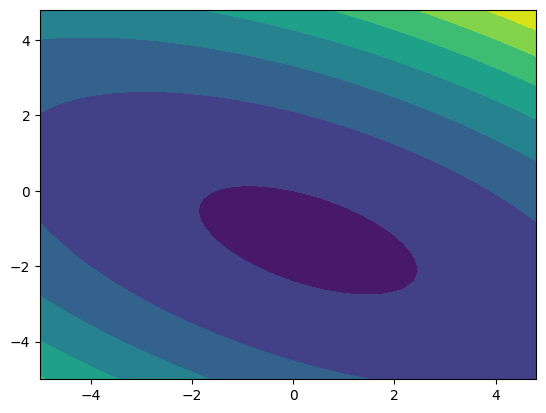

In [16]:
def plot_problem(A, b, solution=None, gradient_descent_traj=None):
    x_min, x_max = -5, 5
    y_min, y_max = -5, 5
    h = .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    all_points = np.c_[xx.ravel(), yy.ravel()]
    Z = .5 * np.sum(all_points * (all_points @ A), axis=1) - np.dot(all_points, b)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z)
    display_legend = False
    if solution is not None:
        plt.scatter(solution[0], solution[1], label='minimizer', c='orange')
        display_legend = True
    if gradient_descent_traj is not None:
        plt.plot(gradient_descent_traj[:, 0], gradient_descent_traj[:, 1], c='red', label='trajectory') 
        plt.scatter(gradient_descent_traj[:, 0], gradient_descent_traj[:, 1], c='red', marker='x')
        display_legend = True
    if display_legend:
        plt.legend()
    
plot_problem(A, b)

This problem is very convenient because --unlike most optimization problems-- we know its solution in closed-form.


**Question 1:** What is the solution to this problem? Complete the following function to compute the solution. Check that it looks good using the `plot_problem` function. Also compute the value of the minimum of the function `f_min`.

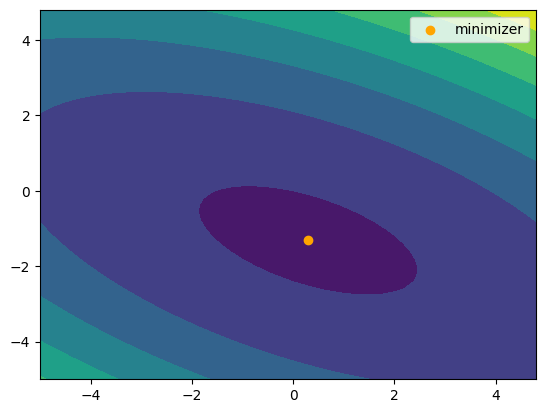

In [17]:
def get_solution(A, b):
    return # type your code here

solution = get_solution(A, b)
plot_problem(A, b, solution)
f_min = # type your code here

## Gradient descent

Gradient descent is an iterative method that tries to converge to the minimizer of the function. It starts from a first guess $x_0$ and then iterates
$$ x_{n+1} = x_n - \eta\nabla f(x_n)$$
with $\eta>0$ a fixed step-size.

**Question 2:** For the above problem, give a condition on $\eta$ that guarantees that we always have $f(x_{n+1})\leq f(x_n)$. The condition should be of the form $\eta \in [0, \eta_{max}]$ where $\eta_{max}$ depends on the problem (that is, the matrix `A` and vector `b`). Implement a function that returns the mid-point, $\frac{\eta_{max}}2$.

In [18]:
def compute_step(A, b):
    return # type your code here

We are now ready to implement gradient descent.

**Question 3:** Define a function `gradient_descent(x0, A, b, step, n_iters)` that computes the iterates of gradient descent starting from `x0`, with step-size `step`, up to `n=n_iters`. This function returns `x_list`, which is the trajectory of the iterates, and `f_list`, which is the sequence of the values of the function during the algorithm. Check that the algorithm leads to a reasonable behavior with the `plot_problem` function, and check that it gives decreasing iterates. What happens when you increase the step size to above $\frac{\eta_{max}}2$?

In [19]:
def gradient_descent(x0, A, b, step, n_iters):
    x_list = []
    f_list = []
    x = np.copy(x0)
    for i  in range(n_iters):
        x_list.append(x)
        f_list.append(fun_val(x, A, b))
        x = # type your code here
    return np.array(x_list), np.array(f_list)

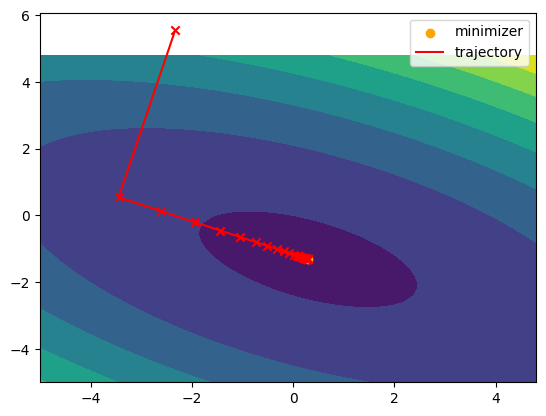

In [20]:
traj, f_list = gradient_descent(3 * np.random.randn(d), A, b, compute_step(A, b), 30)
plot_problem(A, b, solution, traj)

**Question 4:** What is the theoretical convergence speed of $\|x_n  - x^*\|$, where $x^*$ is the solution of the problem? You should obtain an upper bound that depends on the smallest eigenvalue of $A$. Check that your upper bound is correct.

**Question 5:** Generate problems of higher dimensions (take a larger $d$). Look at the behavior of $\|x_n  - x^*\|$. What do you observe ? Can you explain what is going on?

**Question 6:** Now, consider instead as a measure of convergence the quantity $f(x_n) - f(x^*)$. What do you observe on this quantity as the dimension $d$ increases? Can you prove it?